# <font color = navy> Credit EDA Assignment

## <font color = brown> Probelm Statement - I

#### Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
-  If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
-  If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

-  The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

-  All other cases: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

-  Approved: The Company has approved loan Application

-  Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

-  Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

-  Unused offer:  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

## <font color = navy> Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).



## <font color= brown> Probem Statement - II

#### Expected Outcome 
1.Present the overall approach of the analysis in a presentation. Mention the problem statement and the analysis approach briefly. <br>
2.Identify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)

#### Importing Libraries for Analysis

In [1]:
#Inmporting neccessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Imporing Warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#importing the file data dictionary file for Ref.
Col_d = pd.read_csv("columns_description.csv",  sep=",", encoding='mac_roman')

In [4]:
#for reference print data dictinary Col_d
Col_d

Unnamed: 0                     Table                        Row  \
0             1          application_data                 SK_ID_CURR   
1             2          application_data                     TARGET   
2             5          application_data         NAME_CONTRACT_TYPE   
3             6          application_data                CODE_GENDER   
4             7          application_data               FLAG_OWN_CAR   
..          ...                       ...                        ...   
155         209  previous_application.csv             DAYS_FIRST_DUE   
156         210  previous_application.csv  DAYS_LAST_DUE_1ST_VERSION   
157         211  previous_application.csv              DAYS_LAST_DUE   
158         212  previous_application.csv           DAYS_TERMINATION   
159         213  previous_application.csv  NFLAG_INSURED_ON_APPROVAL   

                                           Description  \
0                             ID of loan in our sample   
1    Target variable (1 - client with payment diffi...   
2          Identification if loan is cash or revolving   
3                                 Gender of the client   
4                        Flag if the client owns a car   
..                                                 ...   
155  Relative to application date of current applic...   
156  Relative to application date of current applic...   
157  Relative to application date of current applic...   
158  Relative to application date of current applic...   
159  Did the client requested insurance during the ...   

                                   Special  
0                                      NaN  
1                                      NaN  
2                                      NaN  
3                                      NaN  
4                                      NaN  
..                                     ...  
155  time only relative to the application  
156  time only relative to the application  
157  time only relative to the application  
158  time only relative to the application  
159                                    NaN  

[160 rows x 5 columns]

## <font color= Green> Application Data Analysis

In [5]:
#importing file dataset
Appl = pd.read_csv("application_data.csv")

In [6]:
#cheking shape the of Dataframe
print(Appl.shape)       #Appl has 307511 rows and 122 columns

(307511, 122)


In [7]:
#print the head of Appl
Appl.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [8]:
#print the tail of Appl
Appl.tail()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
307506                         NaN                        NaN   
307507                         NaN                        NaN   
307508                         0.0                        1.0   
307509                         0.0                        0.0   
307510                         0.0                        2.0   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
307506                        NaN                         NaN  
307507                        NaN                         NaN  
307508                        0.0                         1.0  
307509                        0.0                         0.0  
307510                        0.0                         1.0  

[5 rows x 122 columns]

#### Dropping unneccesary columns

In [9]:
#Dropping of unnecessary Columns
Appl.drop('CNT_CHILDREN', axis=1, inplace = True)
Appl.drop('REGION_POPULATION_RELATIVE', axis= 1, inplace = True)
Appl.drop('NAME_TYPE_SUITE', axis= 1, inplace = True)
Appl.drop('OWN_CAR_AGE', axis= 1, inplace = True)
Appl.drop('WEEKDAY_APPR_PROCESS_START', axis= 1, inplace = True)
Appl.drop('HOUR_APPR_PROCESS_START', axis= 1, inplace = True)
Appl.drop(Appl.loc[:,'EXT_SOURCE_1':'EMERGENCYSTATE_MODE'].columns, axis=1,inplace=True)

In [10]:
#cheking info and data types of columns
Appl.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 66 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

###  <font color= brown> **Missing Value Percentage in Dataframe**

In [11]:
#missing values in %
Appl.isna().sum().sort_values(ascending = False).head(63)*100/len(Appl)

OCCUPATION_TYPE                31.345545
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
                                 ...    
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
Length: 63, dtype: float64

### <font color = Brown>  Fixing Rows and Column, Imputing Values and Handeling Missing Values

**DAYS_BIRTH Column**

In [12]:
#checking if any missing value is there in column DAYS_BIRTH
Appl.DAYS_BIRTH.isnull().sum()

0

In [13]:
#convetrting days in to year
Appl['Age']= abs(Appl.DAYS_BIRTH/365)//1

In [14]:
#read the column Age
Appl.Age

0         25.0
1         45.0
2         52.0
3         52.0
4         54.0
          ... 
307506    25.0
307507    56.0
307508    41.0
307509    32.0
307510    46.0
Name: Age, Length: 307511, dtype: float64

In [15]:
#bucketing Age column
Appl['Age_Group']= pd.cut(Appl.Age, [0,30,40,50,60,999], labels = ['<30','30-40','40-50','50-60','60+'])

In [16]:
#cheking each bucket of age with their respecting percentage
Appl.Age_Group.value_counts(normalize = True)*100

30-40    27.028952
40-50    24.194582
50-60    22.054170
<30      17.172069
60+       9.550227
Name: Age_Group, dtype: float64

**AMT_INCOME Column**

In [17]:
#checking missing values AMT_INCOME_TOTAL   
Appl.AMT_INCOME_TOTAL.isnull().sum()

0

In [18]:
#read the column AMT_INCOME_TOTAL
Appl.AMT_INCOME_TOTAL   

0         202500.0
1         270000.0
2          67500.0
3         135000.0
4         121500.0
            ...   
307506    157500.0
307507     72000.0
307508    153000.0
307509    171000.0
307510    157500.0
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: float64

In [19]:
#bucket or binned of column Appl.AMT_INCOME_TOTAL
Appl['Income_Group']= pd.cut(Appl.AMT_INCOME_TOTAL , [0,100000,200000,300000, 400000, 500000,600000], labels = ['<1L','1L-2L','2L-3L','3L-4L','5L-6L','6L+'])
Appl.Income_Group.value_counts()

1L-2L    155898
2L-3L     65176
<1L       63698
3L-4L     14676
5L-6L      5361
6L+        1095
Name: Income_Group, dtype: int64

In [20]:
#read AMT_INCOME_TOTAL column
Appl.AMT_INCOME_TOTAL

0         202500.0
1         270000.0
2          67500.0
3         135000.0
4         121500.0
            ...   
307506    157500.0
307507     72000.0
307508    153000.0
307509    171000.0
307510    157500.0
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: float64

In [21]:
#converting column AMT_INCOME_TOTAL from float to int
Appl.AMT_INCOME_TOTAL.astype(int)

0         202500
1         270000
2          67500
3         135000
4         121500
           ...  
307506    157500
307507     72000
307508    153000
307509    171000
307510    157500
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: int32

**AMT_GOODS_PRICE**

In [22]:
#read the column AMT_GOODS_PRICE
Appl.AMT_GOODS_PRICE

0          351000.0
1         1129500.0
2          135000.0
3          297000.0
4          513000.0
            ...    
307506     225000.0
307507     225000.0
307508     585000.0
307509     319500.0
307510     675000.0
Name: AMT_GOODS_PRICE, Length: 307511, dtype: float64

In [23]:
#checking missing values AMT_GOODS_PRICE 
Appl.AMT_GOODS_PRICE.isnull().sum()

278

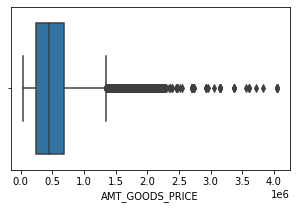

In [24]:
plt.figure(figsize=[5,3])
sns.boxplot(Appl.AMT_GOODS_PRICE)
plt.show() 
#as outlier is present in the coulmn hence we will replace missing value with median

In [25]:
#imputing values
Appl['AMT_GOODS_PRICE'].fillna(Appl.AMT_GOODS_PRICE.median(), inplace= True)

In [26]:
#cross check if any missing value prsent in column
Appl.AMT_GOODS_PRICE.isnull().sum()

0

In [27]:
#convert it data type to int from float
Appl.AMT_GOODS_PRICE.astype(int)

0          351000
1         1129500
2          135000
3          297000
4          513000
           ...   
307506     225000
307507     225000
307508     585000
307509     319500
307510     675000
Name: AMT_GOODS_PRICE, Length: 307511, dtype: int32

**AMT_CREDIT Column** 

In [28]:
#read the column AMT_CREDIT  
Appl. AMT_CREDIT  

0          406597.5
1         1293502.5
2          135000.0
3          312682.5
4          513000.0
            ...    
307506     254700.0
307507     269550.0
307508     677664.0
307509     370107.0
307510     675000.0
Name: AMT_CREDIT, Length: 307511, dtype: float64

In [29]:
#checking missing values
Appl.AMT_CREDIT.isnull().sum() #no actoin is needed

0

In [30]:
#convert data type from float to int 
Appl.AMT_CREDIT.astype(int)

0          406597
1         1293502
2          135000
3          312682
4          513000
           ...   
307506     254700
307507     269550
307508     677664
307509     370107
307510     675000
Name: AMT_CREDIT, Length: 307511, dtype: int32

**OCCUPATION_TYPE Column**

In [31]:
#read column OCCUPATION_TYPE
Appl.OCCUPATION_TYPE

0            Laborers
1          Core staff
2            Laborers
3            Laborers
4          Core staff
             ...     
307506    Sales staff
307507            NaN
307508       Managers
307509       Laborers
307510       Laborers
Name: OCCUPATION_TYPE, Length: 307511, dtype: object

In [32]:
#count the missing values
Appl.OCCUPATION_TYPE.isnull().sum()

96391

In [33]:
#checking missing values in %
100*96391/len(Appl.OCCUPATION_TYPE)

31.345545362604916

In [34]:
#using mode fucntion to get most frequent value
Appl.OCCUPATION_TYPE.mode()

0    Laborers
dtype: object

In [35]:
#imputing most frequent value in OCCUPATION_TYPE
Appl.OCCUPATION_TYPE.fillna(Appl.OCCUPATION_TYPE.mode()[0], inplace = True)

In [36]:
Appl.OCCUPATION_TYPE.isnull().sum()

0

**NAME_EDUCATION_TYPE**

In [37]:
#read the column NAME_EDUCATION_TYPE
Appl.NAME_EDUCATION_TYPE   #no action is needed

0         Secondary / secondary special
1                      Higher education
2         Secondary / secondary special
3         Secondary / secondary special
4         Secondary / secondary special
                      ...              
307506    Secondary / secondary special
307507    Secondary / secondary special
307508                 Higher education
307509    Secondary / secondary special
307510                 Higher education
Name: NAME_EDUCATION_TYPE, Length: 307511, dtype: object

**AMT_REQ_CREDIT_BUREAU_YEAR Column**

In [38]:
#read the column AMT_REQ_CREDIT_BUREAU_YEAR
Appl.AMT_REQ_CREDIT_BUREAU_YEAR

0         1.0
1         0.0
2         0.0
3         NaN
4         0.0
         ... 
307506    NaN
307507    NaN
307508    1.0
307509    0.0
307510    1.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, Length: 307511, dtype: float64

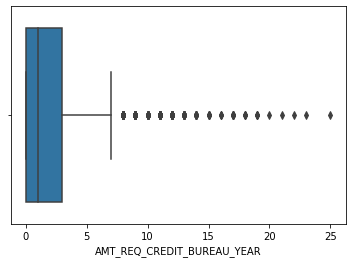

In [39]:
#check if outlier present in colum AMT_REQ_CREDIT_BUREAU_YEAR
sns.boxplot(Appl.AMT_REQ_CREDIT_BUREAU_YEAR)
plt.show()                         

**↑↑ As the value is continues hence mean will be used for imputing ↑↑**

In [40]:
#check the missing values
Appl.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

41519

In [41]:
#checking missing values in percentage
Appl.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()*100/len(Appl)

13.501630835970095

In [42]:
#find the mean of of column and imput the mean in column
Appl.AMT_REQ_CREDIT_BUREAU_YEAR.mean()
Appl.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(Appl.AMT_REQ_CREDIT_BUREAU_YEAR.mean(), inplace=True)

In [43]:
#cross check if missing value present in column AMT_REQ_CREDIT_BUREAU_YEAR
Appl.AMT_REQ_CREDIT_BUREAU_YEAR.isna().sum()

0

**AMT_REQ_CREDIT_BUREAU_QRT Column**

In [44]:
#read the column
Appl.AMT_REQ_CREDIT_BUREAU_QRT

0         0.0
1         0.0
2         0.0
3         NaN
4         0.0
         ... 
307506    NaN
307507    NaN
307508    0.0
307509    0.0
307510    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, Length: 307511, dtype: float64

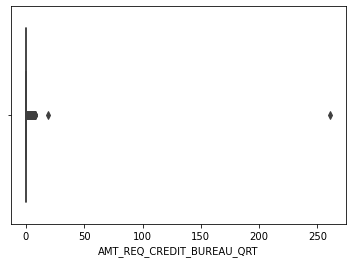

In [45]:
#check if outlier present in column AMT_REQ_CREDIT_BUREAU_QRT
sns.boxplot(Appl.AMT_REQ_CREDIT_BUREAU_QRT)
plt.show()

**↑↑ Outlier is present so median will be used for imputing ↑↑**

In [46]:
#check the missing values
Appl.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

41519

In [47]:
#take the mean of column and imput it in the same(AMT_REQ_CREDIT_BUREAU_QRT)
Appl.AMT_REQ_CREDIT_BUREAU_QRT.median()
Appl.AMT_REQ_CREDIT_BUREAU_QRT.fillna(Appl.AMT_REQ_CREDIT_BUREAU_QRT.median(), inplace= True)

In [48]:
#cross check if any missing value present in column AMT_REQ_CREDIT_BUREAU_QRT
Appl.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

0

**AMT_REQ_CREDIT_BUREAU_MON Column**

In [49]:
#read the column REQ_CREDIT_BUREAU_MON
Appl.AMT_REQ_CREDIT_BUREAU_MON

0         0.0
1         0.0
2         0.0
3         NaN
4         0.0
         ... 
307506    NaN
307507    NaN
307508    1.0
307509    0.0
307510    2.0
Name: AMT_REQ_CREDIT_BUREAU_MON, Length: 307511, dtype: float64

In [50]:
#check the missing values in column
Appl.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

41519

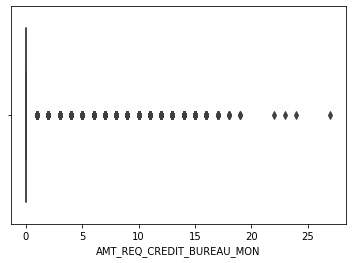

In [51]:
#cehck if outlier is present
sns.boxplot(Appl.AMT_REQ_CREDIT_BUREAU_MON)
plt.show()

**↑↑ As values are contineous mean will be used for imputing ↑↑**

In [52]:
#take the mean and inpute it in the same column (Appl.AMT_REQ_CREDIT_BUREAU_MON)
Appl.AMT_REQ_CREDIT_BUREAU_MON.mean()
Appl.AMT_REQ_CREDIT_BUREAU_MON.fillna(Appl.AMT_REQ_CREDIT_BUREAU_MON.mean(), inplace= True)

In [53]:
#chek if any missing value present in column AMT_REQ_CREDIT_BUREAU_MON
Appl.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

0

**CODE_GENDER Column**

In [54]:
# Replace the XNA value with F
Appl.loc[Appl.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'
Appl.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [55]:
#create gender_flag of numerical data type where response "yes"= 1, "no"= 0
Appl['gender_flag'] = np.where(Appl.CODE_GENDER == 'M',1,0)

### <font color = brown > Checking Imbalance

In [56]:
#cheking percentage of Target variable
Appl.TARGET.value_counts(normalize= True)*100 # it is balance

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [57]:
#cheking percentage of CODE_GENDER variable
Appl.CODE_GENDER.value_counts(normalize= True)*100

F    65.835694
M    34.164306
Name: CODE_GENDER, dtype: float64

#### ↑ No Balancing is Required ↑

## <font color = navy> Splitting Dataframe
1. Appl_0 (Non_defaulter)
2. Appl_1 (defaulter)

In [58]:
#read the dataframe for non-defulter
Appl_0 = Appl[Appl.TARGET== 0]
Appl_0

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307505      456249       0         Cash loans           F            N   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1                    N          270000.0   1293502.5      35698.5   
2                    Y           67500.0    135000.0       6750.0   
3                    Y          135000.0    312682.5      29686.5   
4                    Y          121500.0    513000.0      21865.5   
5                    Y           99000.0    490495.5      27517.5   
...                ...               ...         ...          ...   
307505               Y          112500.0    225000.0      22050.0   
307506               N          157500.0    254700.0      27558.0   
307507               Y           72000.0    269550.0      12001.5   
307508               Y          153000.0    677664.0      29979.0   
307510               N          157500.0    675000.0      49117.5   

        AMT_GOODS_PRICE  ... AMT_REQ_CREDIT_BUREAU_HOUR  \
1             1129500.0  ...                        0.0   
2              135000.0  ...                        0.0   
3              297000.0  ...                        NaN   
4              513000.0  ...                        0.0   
5              454500.0  ...                        0.0   
...                 ...  ...                        ...   
307505         225000.0  ...                        0.0   
307506         225000.0  ...                        NaN   
307507         225000.0  ...                        NaN   
307508         585000.0  ...                        1.0   
307510         675000.0  ...                        0.0   

       AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK  \
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            NaN                        NaN   
4                            0.0                        0.0   
5                            0.0                        0.0   
...                          ...                        ...   
307505                       0.0                        0.0   
307506                       NaN                        NaN   
307507                       NaN                        NaN   
307508                       0.0                        0.0   
307510                       0.0                        0.0   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
1                       0.000000                        0.0   
2                       0.000000                        0.0   
3                       0.267395                        0.0   
4                       0.000000                        0.0   
5                       0.000000                        1.0   
...                          ...                        ...   
307505                  2.000000                        0.0   
307506                  0.267395                        0.0   
307507                  0.267395                        0.0   
307508                  1.000000                        0.0   
307510                  2.000000                        0.0   

        AMT_REQ_CREDIT_BUREAU_YEAR   Age  Age_Group  Income_Group  

In [59]:
#read the dataframe for defalulter
Appl_1 = Appl[Appl.TARGET== 1]
Appl_1

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
26          100031       1         Cash loans           F            N   
40          100047       1         Cash loans           M            N   
42          100049       1         Cash loans           F            N   
81          100096       1         Cash loans           F            N   
...            ...     ...                ...         ...          ...   
307448      456186       1         Cash loans           M            N   
307475      456215       1         Cash loans           F            N   
307481      456225       1         Cash loans           M            N   
307489      456233       1         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   

       FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                    Y          202500.0    406597.5      24700.5   
26                   Y          112500.0    979992.0      27076.5   
40                   Y          202500.0   1193580.0      35028.0   
42                   N          135000.0    288873.0      16258.5   
81                   Y           81000.0    252000.0      14593.5   
...                ...               ...         ...          ...   
307448               N          207000.0    450000.0      32746.5   
307475               N          144000.0   1303200.0      46809.0   
307481               Y          225000.0    297000.0      19975.5   
307489               Y          225000.0    521280.0      23089.5   
307509               Y          171000.0    370107.0      20205.0   

        AMT_GOODS_PRICE  ... AMT_REQ_CREDIT_BUREAU_HOUR  \
0              351000.0  ...                        0.0   
26             702000.0  ...                        0.0   
40             855000.0  ...                        0.0   
42             238500.0  ...                        0.0   
81             252000.0  ...                        0.0   
...                 ...  ...                        ...   
307448         450000.0  ...                        0.0   
307475        1125000.0  ...                        0.0   
307481         297000.0  ...                        0.0   
307489         450000.0  ...                        0.0   
307509         319500.0  ...                        0.0   

       AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK  \
0                            0.0                        0.0   
26                           0.0                        0.0   
40                           0.0                        0.0   
42                           0.0                        0.0   
81                           0.0                        0.0   
...                          ...                        ...   
307448                       0.0                        0.0   
307475                       0.0                        0.0   
307481                       0.0                        0.0   
307489                       0.0                        0.0   
307509                       0.0                        0.0   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                            0.0                        0.0   
26                           0.0                        2.0   
40                           2.0                        0.0   
42                           0.0                        0.0   
81                           0.0                        0.0   
...                          ...                        ...   
307448                       0.0                        0.0   
307475                       1.0                        0.0   
307481                       0.0                        0.0   
307489                       0.0                        1.0   
307509                       0.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_YEAR   Age  Age_Group  Income_Group  

### <font color= navy> Univariate Analysis
-  Appl_0
-  Appl_1

<font color = 'brown'> **↓↓ Bar graph for column  variable Name Contract for Appl_0 ↓↓**

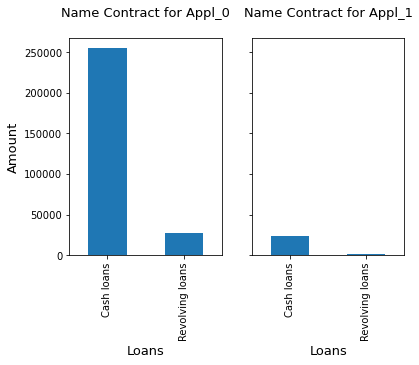

In [60]:
#plot the bar graph Name Contract for Appl_0
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True, sharey=True)
plt.subplot(1,2,1)
Appl_0.NAME_CONTRACT_TYPE.value_counts().plot.bar()
plt.title('Name Contract for Appl_0\n', fontdict={'fontsize':13, 'fontweight': 4 })
plt.xlabel('Loans', fontdict={'fontsize':13, 'fontweight':5})
plt.ylabel('Amount', fontdict={'fontsize':13, 'fontweight':5})

plt.subplot(1,2,2)
Appl_1.NAME_CONTRACT_TYPE.value_counts().plot.bar()
plt.title('Name Contract for Appl_1\n', fontdict={'fontsize':13, 'fontweight': 4 })
plt.xlabel('Loans', fontdict={'fontsize':13, 'fontweight':5})
plt.ylabel('Amount', fontdict={'fontsize':13, 'fontweight':5})
plt.show()

<font color = 'navy'> **Obsevations**
-  For Non-Defaulter the loan Amount big is very as compare to defaulter and this should be the case as Non-Defaulter will    pay the but Defaulter won't hence our observation are correct 

<font color = 'brown'> **↓↓ Pie Chart for Variable Column CODE_GENDER ↓↓**

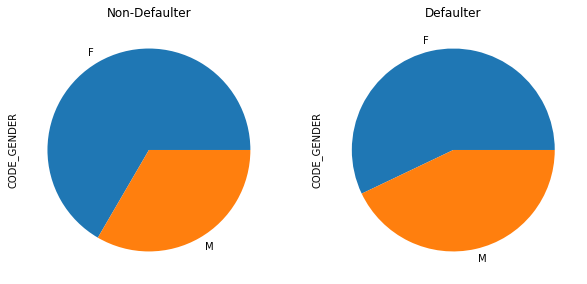

In [61]:
#drw pieplot for column variable CODE_GENDER
plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.title('Non-Defaulter')
Appl_0.CODE_GENDER.value_counts().plot.pie()
plt.subplot(1,2,2)
Appl_1.CODE_GENDER.value_counts().plot.pie()
plt.title('Defaulter')
plt.show()

<font color = 'navy'> **Obsevations**
-  As we can clearly see in above plot in Non-Defaulter case Females are more and as compare to Defaulter 
-  By above plot males are more in Defaulter case as compare to Non-Defaulter

<font color = 'brown'> **↓↓ Simple-Plot and Boxplot for column varibale AMT_INCOME_TOTAL↓↓**

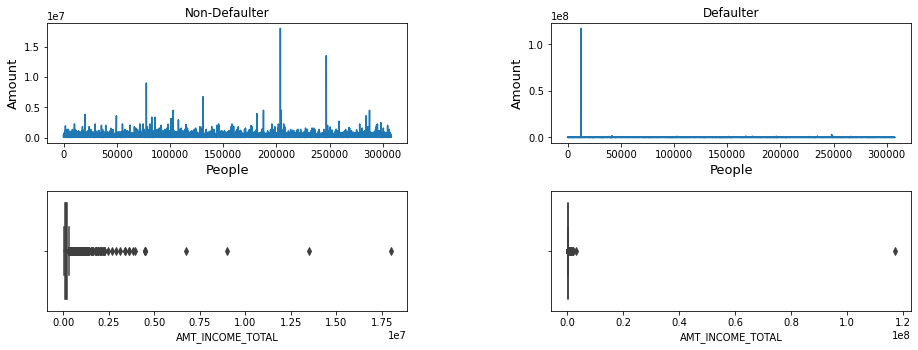

In [62]:
#draw the plot for column varibale AMT_INCOME_TOTAL
plt.figure(figsize=[15,5])
plt.subplot(2,2,1)
plt.title('Non-Defaulter')
Appl_0.AMT_INCOME_TOTAL.plot()
plt.xlabel('People', fontdict={'fontsize':13, 'fontweight':5})
plt.ylabel('Amount', fontdict={'fontsize':13, 'fontweight':5})

plt.subplot(2,2,2)
plt.title('Defaulter')
Appl_1.AMT_INCOME_TOTAL.plot()
plt.xlabel('People', fontdict={'fontsize':13, 'fontweight':5})
plt.ylabel('Amount', fontdict={'fontsize':13, 'fontweight':5})

plt.subplot(2,2,3)
sns.boxplot(Appl_0.AMT_INCOME_TOTAL)

plt.subplot(2,2,4)
sns.boxplot(Appl_1.AMT_INCOME_TOTAL)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

<font color = 'navy'> **Obsevations**
-  In case of Non-Defaulter most of people their Income is realistic Countineous And some of income is High
-  In case of Defaulter case Defaulter people income is low and not realistic and outlier is present hence it is
   considered as Defaulters

### <font color= navy> Bivariate Analysis
-  Appl_0
-  Appl_1

<font color = 'brown'> **↓↓ Scatter plot for Age and  AMT_INCOME_TOTAL Column Varibale ↓↓**

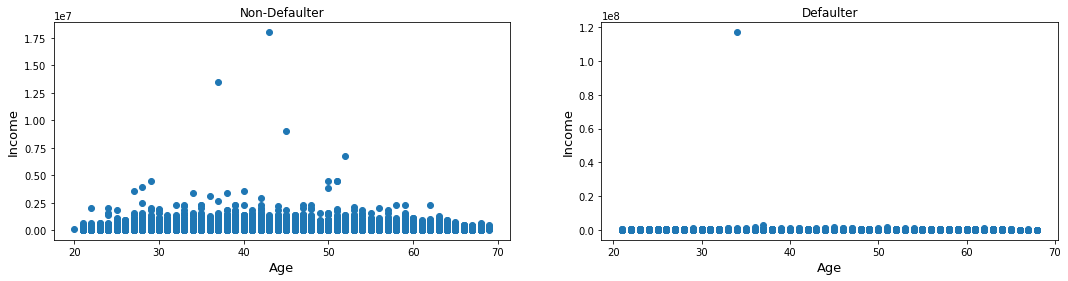

In [63]:
plt.figure(figsize=[18,4])
plt.subplot(1,2,1)
plt.title('Non-Defaulter')
plt.scatter(Appl_0.Age,Appl_0.AMT_INCOME_TOTAL )
plt.xlabel('Age', fontdict={'fontsize':13, 'fontweight':5})
plt.ylabel('Income', fontdict={'fontsize':13, 'fontweight':5})


plt.subplot(1,2,2)
plt.title('Defaulter')
plt.scatter(Appl_1.Age,Appl_1.AMT_INCOME_TOTAL )
plt.xlabel('Age', fontdict={'fontsize':13, 'fontweight':5})
plt.ylabel('Income', fontdict={'fontsize':13, 'fontweight':5})
plt.show()

<font color = 'navy'> **Obsevations**
- In case of Non-Defalulter income with respect to age is pretty much continueos 
- for Defaulter it is not contineous and there is huge gap too (outlier)
- Hence we can conlude people with low income and high income can be Defaulters
  

<font color = 'brown'> **↓↓ Boxplot for NAME_EDUCATION_TYPE and  AMT_CREDIT Column Varibale ↓↓**

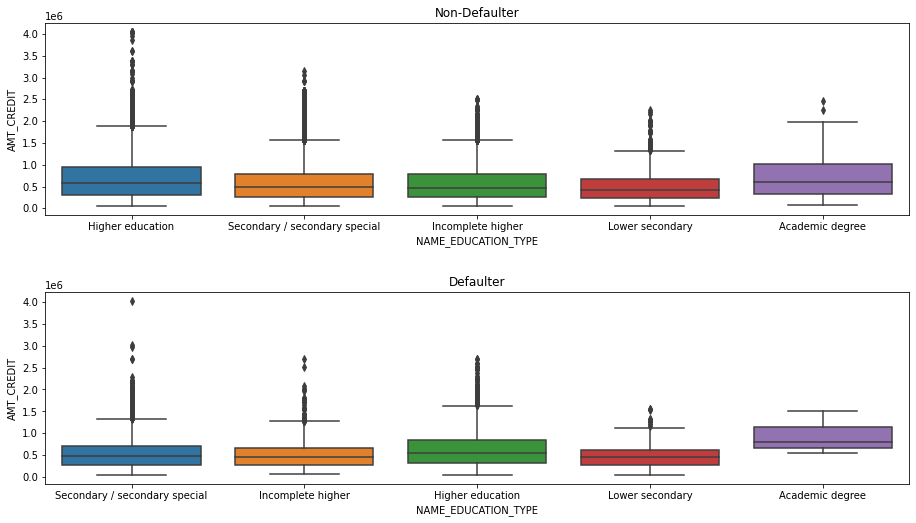

In [64]:
plt.figure(figsize=[15,8])
plt.subplot(2,1,1)
plt.title('Non-Defaulter')
sns.boxplot(data= Appl_0,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT')

plt.subplot(2,1,2)
plt.title('Defaulter')
sns.boxplot(data= Appl_1,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()


<font color = 'navy'> **Obsevations**
   
- For Non-Defaulter the AMT_CREDIT is continious with respect to Education gradually increasing no significant change         is observed
- For Defaulter only in Secondary/Secondary special is exception and has outlier means people who has secondary
  /secondary special education tend to have payment in difficulties and asked for more AMT_CREDIT As compare to rest

<font color = 'brown'> **↓↓ Barplot for NAME_EDUCATION_TYPE and  AMT_GOODS_PRICE Column Varibale ↓↓**

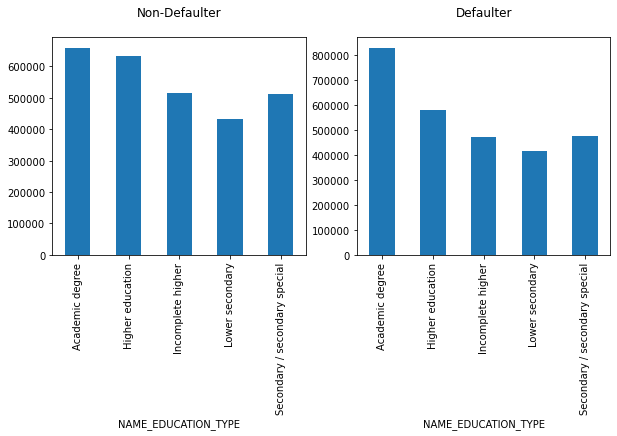

In [65]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title('Non-Defaulter\n')
Appl_0.groupby('NAME_EDUCATION_TYPE')['AMT_GOODS_PRICE'].mean().plot.bar()
plt.subplot(1,2,2)
plt.title('Defaulter\n')
Appl_1.groupby('NAME_EDUCATION_TYPE')['AMT_GOODS_PRICE'].mean().plot.bar()
plt.show()

<font color = 'navy'> **Obsevations**
   - In case of Non-Defaulter Academic degree and secondary special are more likely to pay the loan As compare to rest
   - The people with high income groups are mostly non defaulters
   - The people who are  highly qualified are mostly non defaulters as compared to the one who are simply graduates or          secondary school passed 

### <font color= navy> Multivariate Analysis
-  Appl_0 (Non-Defaulter)

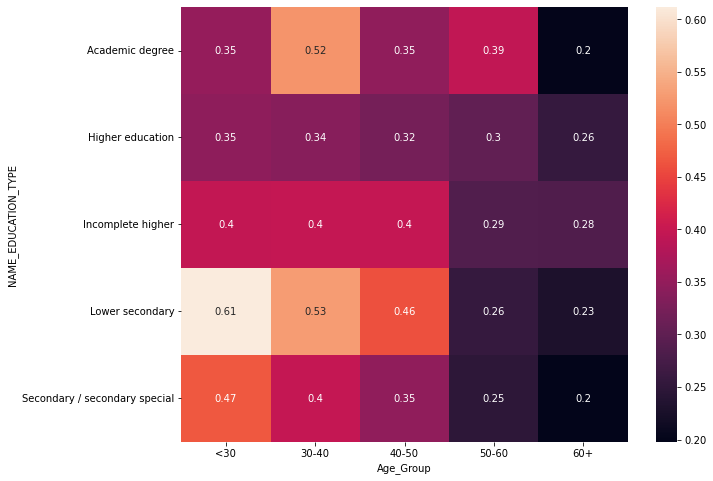

In [66]:
# Analysis of NAME_EDUCATION_TYPE vs Age_Group vs gender_flag
corr1 = pd.pivot_table(Appl_0, index= 'NAME_EDUCATION_TYPE', columns ='Age_Group', values= 'gender_flag' )
plt.figure(figsize=[10, 8])
sns.heatmap(corr1, annot=True, )
plt.show()

<font color = 'navy'> **Obsevations**
   - Here we can observe that  people who are highly educated are likely to be non- defaulters as compared to the ones who      are with lower educational qualification.
   - The lower educated people are likely to be more defaulters

-  Appl_1 (Defaulter)

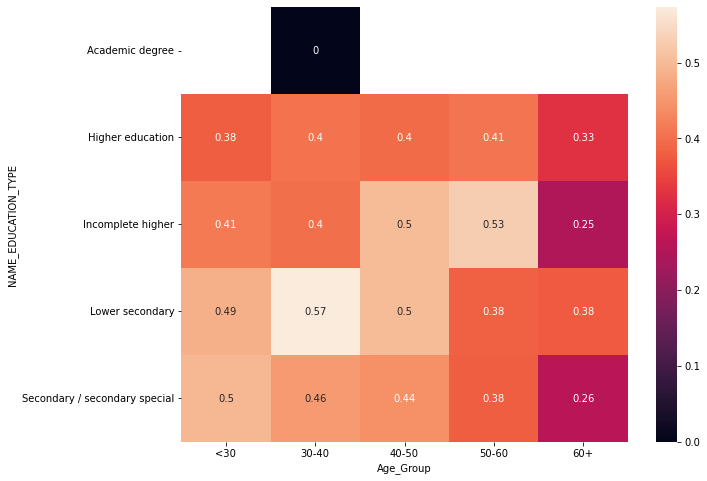

In [67]:
# Analysis of NAME_EDUCATION_TYPE vs Age_Group vs gender_flag
corr2 = pd.pivot_table(Appl_1, index= 'NAME_EDUCATION_TYPE', columns ='Age_Group', values= 'gender_flag' )
plt.figure(figsize=[10, 8])
sns.heatmap(corr2, annot=True)
plt.show()

<font color = 'navy'> **Obsevations**
  - Here we can see that people with highly paid salary are less likely to defaulter in comparison with the people getting       less or average salary.

## <font color= Green> Previous Application Data Analysis

In [68]:
#importh the dataset 
Pre_a = pd.read_csv('previous_application.csv')

In [69]:
#cheking shape the of Dataframe
print(Pre_a.shape)      #Pre_a had 1670214 rows and 37 columns

(1670214, 37)


In [70]:
#print the head of Pre_a
Pre_a.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [71]:
# print the tail of Pre_a
Pre_a.tail()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
1670209         267295.5    311400.0               0.0         267295.5   
1670210          87750.0     64291.5           29250.0          87750.0   
1670211         105237.0    102523.5           10525.5         105237.0   
1670212         180000.0    191880.0               NaN         180000.0   
1670213         360000.0    360000.0               NaN         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  ...  \
1670209                  WEDNESDAY                       12  ...   
1670210                    TUESDAY                       15  ...   
1670211                     MONDAY                       12  ...   
1670212                  WEDNESDAY                        9  ...   
1670213                     SUNDAY                       10  ...   

         NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  \
1670209             Furniture         30.0        low_normal   
1670210             Furniture         12.0            middle   
1670211  Consumer electronics         10.0        low_normal   
1670212                   XNA         12.0        low_normal   
1670213                   XNA         48.0            middle   

                 PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
1670209   POS industry with interest            365243.0         -508.0   
1670210   POS industry with interest            365243.0        -1604.0   
1670211  POS household with interest            365243.0        -1457.0   
1670212             Cash X-Sell: low            365243.0        -1155.0   
1670213          Cash X-Sell: middle            365243.0        -1163.0   

        DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
1670209                     362.0         -358.0           -351.0   
1670210                   -1274.0        -1304.0          -1297.0   
1670211                   -1187.0        -1187.0          -1181.0   
1670212                    -825.0         -825.0           -817.0   
1670213                     247.0         -443.0           -423.0   

        NFLAG_INSURED_ON_APPROVAL  
1670209                       0.0  
1670210                       0.0  
1670211                       0.0  
1670212                       1.0  
1670213                       0.0  

[5 rows x 37 columns]

#### Dropping unneccesary columns

In [72]:
#Dropping uneccessary columns
Pre_a.drop('WEEKDAY_APPR_PROCESS_START', axis= 1, inplace=True)
Pre_a.drop('AMT_DOWN_PAYMENT', axis= 1, inplace=True)
Pre_a.drop('RATE_DOWN_PAYMENT', axis= 1, inplace=True)
Pre_a.drop('HOUR_APPR_PROCESS_START', axis= 1, inplace=True)
Pre_a.drop(Pre_a.loc[:,'RATE_INTEREST_PRIMARY':'RATE_INTEREST_PRIVILEGED'].columns,axis= 1, inplace=True)
Pre_a.drop('NAME_CASH_LOAN_PURPOSE', axis= 1, inplace=True)
Pre_a.drop(Pre_a.loc[:,'DAYS_FIRST_DRAWING':'DAYS_LAST_DUE'].columns, axis= 1, inplace=True)
Pre_a.drop('SELLERPLACE_AREA', axis= 1, inplace=True)

In [73]:
#cheking info and data types of columns
Pre_a.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 25 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 9   NAME_CONTRACT_STATUS         1670214 non-null  object 
 10  DAYS_DECISION                1670214 non-null  int64  
 11  NAME_PAYMENT_TYPE            1670214 non-null  object 
 12  CODE_REJECT_REASON           1670214 non-n

In [74]:
#cheking info and data types of columns
Pre_a.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 25 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 9   NAME_CONTRACT_STATUS         1670214 non-null  object 
 10  DAYS_DECISION                1670214 non-null  int64  
 11  NAME_PAYMENT_TYPE            1670214 non-null  object 
 12  CODE_REJECT_REASON           1670214 non-n

###  <font color= brown> **Missing Value Percentage in Dataframe**

In [75]:
#missing values in %
Pre_a.isna().sum().sort_values(ascending = False).head(60)*100/len(Pre_a)

NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_GOODS_CATEGORY             0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
SK_ID_PREV                      0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_CURR                      0.000000
NAME_PAYMENT_TYPE               0.000000
DAYS_DECISION                   0.000000
NAME_CONTRACT_STATUS            0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_REJECT_REAS

### <font color = Brown>  Fixing Rows and Column, Imputing Values and Handeling Missing Values

**NFLAG_INSURED_ON_APPROVAL Column**

In [76]:
#find the missing value in column NFLAG_INSURED_ON_APPROVAL 
Pre_a.NFLAG_INSURED_ON_APPROVAL.isna().sum()*100/(len(Pre_a))

40.29812946125467

In [77]:
# imputing median in column NFLAG_INSURED_ON_APPROVAL
Pre_a.NFLAG_INSURED_ON_APPROVAL.fillna(Pre_a.NFLAG_INSURED_ON_APPROVAL.mode(), inplace = True)

In [78]:
#cross check if mrdian is present in NFLAG_INSURED_ON_APPROVAL
Pre_a.NFLAG_INSURED_ON_APPROVAL.mode().isnull().sum()

0

**Pre_a.AMT_GOODS_PRICE**

In [79]:
#checking missing value for AMT_GOODS_PRICE column
Pre_a.AMT_GOODS_PRICE.isnull().sum()

385515

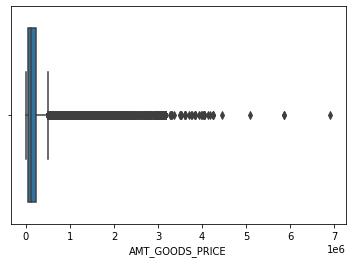

In [80]:
#plot the boxplot for AMT_GOODS_PRICE
sns.boxplot(Pre_a.AMT_GOODS_PRICE)
plt.show()

In [81]:
#as the value amount is contineous we will use mean for imputing
Pre_a.AMT_GOODS_PRICE.fillna(Pre_a.AMT_GOODS_PRICE.mean(), inplace= True)

In [82]:
#cross check missing value is present in AMT_GOODS_PRICE column
Pre_a.AMT_GOODS_PRICE.isna().sum()

0

**AMT_ANNUITY column**

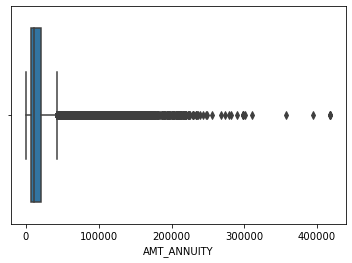

In [83]:
#plot the box plot for AMT_ANNUITY column
sns.boxplot(Pre_a.AMT_ANNUITY  )
plt.show()

In [84]:
#imputing value with  maen because value is contineous in boxplot
Pre_a.AMT_ANNUITY.fillna(Pre_a.AMT_ANNUITY.mean(), inplace=True)
Pre_a.AMT_ANNUITY

0           1730.430
1          25188.615
2          15060.735
3          47041.335
4          31924.395
             ...    
1670209    14704.290
1670210     6622.020
1670211    11520.855
1670212    18821.520
1670213    16431.300
Name: AMT_ANNUITY, Length: 1670214, dtype: float64

In [85]:
#cross check if any missing value present
Pre_a.AMT_ANNUITY.isnull().sum()

0

**CODE_REJECT_REASON Column**

In [86]:
#Handeling the values of XNA in column CODE_REJECT_REASON
Pre_a.loc[Pre_a.CODE_REJECT_REASON == 'XNA','CODE_REJECT_REASON'] = Pre_a.CODE_REJECT_REASON.mode()[0]
Pre_a.CODE_REJECT_REASON.value_counts()

XAP       1358337
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

**NAME_CONTRACT_TYPE Column**

In [87]:
#repalcing value with most common value 'Cash loans' in column NAME_CONTRACT_TYPE
Pre_a.loc[Pre_a.NAME_CONTRACT_TYPE== 'XNA','NAME_CONTRACT_TYPE'] = 'Cash loans'
Pre_a.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747899
Consumer loans     729151
Revolving loans    193164
Name: NAME_CONTRACT_TYPE, dtype: int64

### <font color = brown > Checking Imbalance

In [88]:
#cheking percentage of NFLAG_INSURED_ON_APPROVAL variable
Pre_a.NFLAG_INSURED_ON_APPROVAL.value_counts(normalize= True)*100

0.0    66.742984
1.0    33.257016
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64

#### ↑ No Balancing is Required ↑

In [89]:
Pre_a.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

### <font color = Brown> Univariate Analysis

<font color = 'navy'> **↓↓ Plot the bar graph for NAME_CONTRACT_STATUS ↓↓**

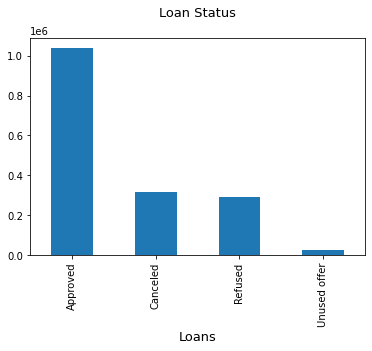

In [90]:
#plot the bar plot for column NAME_CONTRACT_STATUS
Pre_a.NAME_CONTRACT_STATUS.value_counts().plot.bar()
plt.title('Loan Status\n', fontdict={'fontsize':13, 'fontweight': 4 })
plt.xlabel('Loans', fontdict={'fontsize':13, 'fontweight':5})
plt.show()

<font color = 'green'> **Obsevations**
  - In previous Application it seems that most of client has got Approvel for the loan
  - Approved > Canceled > Refused > Unused offer

<font color = 'navy'> **↓↓ Plot the pie chart  for NFLAG_INSURED_ON_APPROVAL ↓↓**

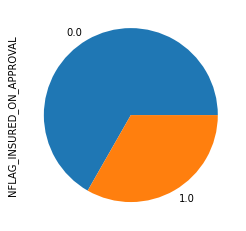

In [91]:
Pre_a.NFLAG_INSURED_ON_APPROVAL.value_counts().plot.pie()
plt.show()

<font color = 'green'> **Obsevations**
  - From Above plot is seems that during Application most clients were asking for insurance

<font color = 'navy'> **↓↓ Plot the distplot  for AMT_CREDIT ↓↓**

<function matplotlib.pyplot.show(close=None, block=None)>

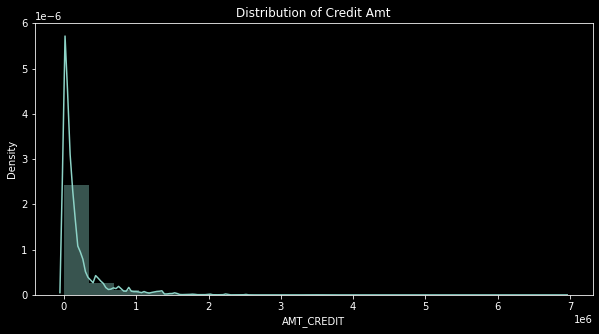

In [92]:
plt.style.use('dark_background')
plt.figure(figsize=[10,5])
sns.distplot(Pre_a.AMT_CREDIT, bins =20)
plt.title('Distribution of Credit Amt', fontsize = 12)
plt.show

<font color = 'green'> **Obsevations**
  - From Above plot is seems that the In pre. application people are more likely to ask for Amount In between 10k - 150k

### <font color = Brown> Bivariate and Multivariate Analysis

In [93]:
#To reset all the settings we have set
plt.style.use('default')
%matplotlib inline

<font color = 'navy'> **↓↓ Plot the scatter plot  for NAME_CONTRACT_STATUS and AMT_CREDIT ↓↓**

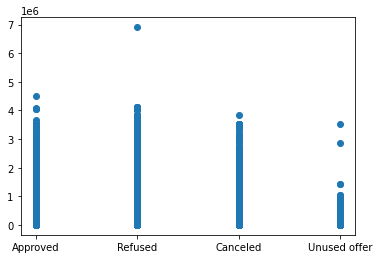

In [94]:
#plot the scatter plot
plt.scatter(Pre_a.NAME_CONTRACT_STATUS, Pre_a.AMT_CREDIT )
plt.show()

<font color = 'green'> **Obsevations**
  - In Prev. Application the freq. of status Approved, Refused, Canceled same except Unused offer

<font color = 'navy'> **↓↓ Plot the bar graph of AMT_GOODS_PRICE'S mean an median with NAME_CONTRACT_STATUS ↓↓**

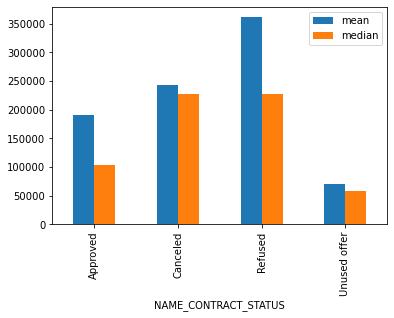

In [95]:
#plot the bar graph of AMT_GOODS_PRICE'S mean an median with NAME_CONTRACT_STATUS.
Pre_a.groupby('NAME_CONTRACT_STATUS')['AMT_GOODS_PRICE'].aggregate(['mean', 'median']).plot.bar()
plt.show()

<font color = 'green'> **Obsevations** 
  - In case of Approved mean is greater than median (Goods Price)
  - Significantly In case of refused mean is bit high compare to median 
  - It shows that most of client Application getting rejected and refused 

<font color = 'navy'> **↓↓ Plot the pairplot for AMT_CREDIT, AMT_GOODS_PRICE,AMT_APPLICATION ↓↓**

<Figure size 864x864 with 0 Axes>

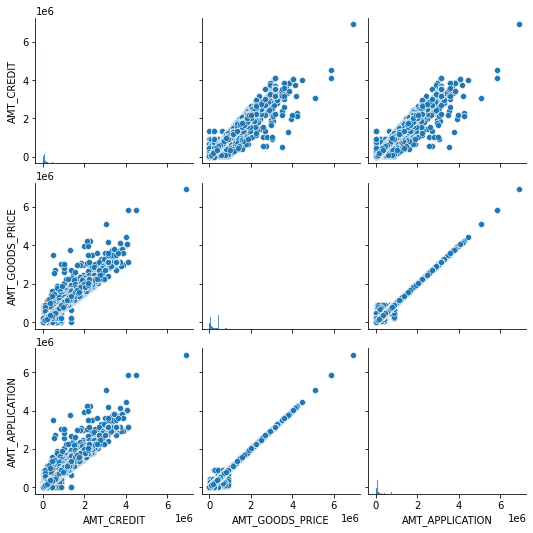

In [96]:
#plot the pairplot for AMT_CREDIT,AMT_GOODS_PRICE and AMT_APPLICATION
plt.figure(figsize=[12,12])
sns.pairplot(data= Pre_a, vars=['AMT_CREDIT', 'AMT_GOODS_PRICE','AMT_APPLICATION'] )
plt.show()

<font color = 'green'> **Obsevations**

 1 - Amount of goods price and Amount of credit is correalated and it also cause causetion <br>
 2 - Amount of Credit And Amount of Application are correlated <br>
 3 - Amount of goods price and amount of application has linear relation between them (Causetion)

<font color = 'navy'> **↓↓ Plot the heatmap for AMT_CREDIT,AMT_GOODS_PRICE and AMT_APPLICATION ↓↓**

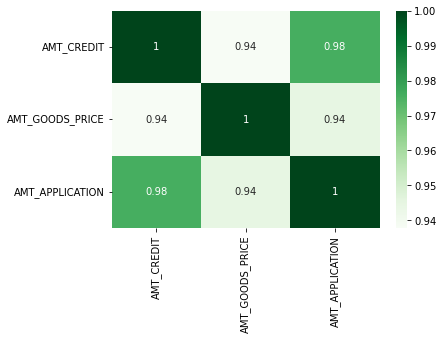

In [97]:
#plot the heatmap forfor AMT_CREDIT,AMT_GOODS_PRICE and AMT_APPLICATION
sns.heatmap(Pre_a[['AMT_CREDIT', 'AMT_GOODS_PRICE','AMT_APPLICATION']].corr(),annot= True, cmap='Greens')
plt.show()

<font color = 'green'> **Obsevations**

 1 - Amount of goods price and Amount of credit is correalated and it also cause causetion <br>
 2 - Amount of Credit And Amount of Application are correlated <br>
 3 - Amount of goods price and amount of application has linear relation between them (Causetion)

<font color = 'navy'> **↓↓ Plot the heatmap for NAME_CONTRACT_TYPE,NAME_CONTRACT_STATUS and AMT_CREDIT ↓↓**

In [98]:
#Plot the heatmap NAME_CONTRACT_TYPE vs NAME_CONTRACT_STATUS vs AMT_CREDIT
Htmp = pd.pivot_table(Pre_a, index='NAME_CONTRACT_TYPE', columns='NAME_CONTRACT_STATUS', values='AMT_CREDIT')

In [99]:
# print the pivot table ofNAME_CONTRACT_TYPE vs NAME_CONTRACT_STATUS vs AMT_CREDIT
Htmp

NAME_CONTRACT_STATUS       Approved      Canceled        Refused  Unused offer
NAME_CONTRACT_TYPE                                                            
Cash loans            420933.666044  27749.720928  531939.744454   2459.514170
Consumer loans         89688.411678  50875.412271  114725.611717  71064.100736
Revolving loans       227767.060448   2386.803768  224819.851011  81000.000000

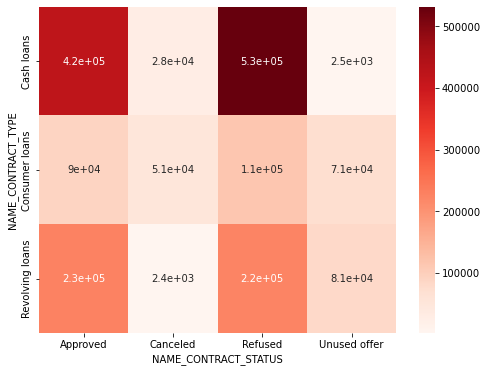

In [100]:
#print the heat mapNAME_CONTRACT_TYPE vs NAME_CONTRACT_STATUS vs AMT_CREDIT
plt.figure(figsize=[8, 6])
sns.heatmap(Htmp, annot = True,cmap="Reds")
plt.show()

<font color = 'green'> **Obsevations**
 -  


- Here it can be seen that a major portion of the loan amount has been refused by the bank. A portion of the major amount     was approved and was provided to the people.                                                      
- For consumer loans the amount is not as huge as compared to cash loans. For revolving loans and unused loan offers,   
  amount is considerably low with respect to the cash loans. 
- A huge amount of loan has been refused by the users i.e. who have good previous records or cibil scores but are not   
  looking for loan seeking opportunities.